---
header-includes: |
   \BeforeBeginEnvironment{document}{
      \usepackage[most]{tcolorbox}
      \let\example\undefined 
      \let\endexample\undefined 
      \newtcolorbox[auto counter]{example}{
        colback=white,
        colbacktitle=black,
        arc=0mm,
        title={Example~\thetcbcounter:},
        bottom=-.7\baselineskip,
        colframe=black,
        fonttitle=\bfseries
   }}
urlcolor: blue
extension: latex_macros
numbersections: true
output:
   bookdown::pdf_document2:
      toc: false
      keep_tex: true
biblio-style: apalike
---

# Lecture 1: Introduction

1. Syllabus + Canvas
2. ChimeIn
3. Jupyter notebooks
4. Basics of Numerical Analysis

Jupyter Notebooks allow you to include Markdown, LaTex, and Julia (as well as python and other languages)

## Markdown

>Note: You may double click to see the syntax and edit cells. Press ctrl+enter to exit edit mode.  
>Pressing enter on the selected cell has the same effect as double clicking

Text in this cell can be **bold**, *italic*, ***bold italic***, quotes 

>"The only source of knowledge is experience"  
>-- Einstein

```
Preformatted text,
    useful for
pseudocode
```

Markdown cheat sheet: [link](https://www.markdownguide.org/basic-syntax/)  

## LaTeX

LaTeX allows you to display math: e.g. $\pi \approx \frac{22}{7}$ and $$f(x) = f(a) + f'(a) (x - a) + \frac{1}{2} f''(a) (x-a)^2 + R(x).$$

LaTex cheat sheet: [link](https://quickref.me/latex.html)  
Draw symbol to get latex syntax: [link](https://detexify.kirelabs.org/classify.html#google_vignette)

## Julia

>You can use greek symbols in Julia code: type \pi and tab to get the symbol  
>You can show the result of a calculation by not ending a line with a semi-colon

In [60]:
π

π = 3.1415926535897...

>Note: you can add comments with #

In [61]:
# Define p
p = 22/7

3.142857142857143

#### Arrays start at 1:

In [62]:
A = [1 2 3 4 5]

1×5 Matrix{Int64}:
 1  2  3  4  5

In [63]:
A[1]

1

### Vectors:

In [64]:
B = [2, 4, 6, 8]

4-element Vector{Int64}:
 2
 4
 6
 8

Vector of objects:

In [65]:
C = [ A , B , "hello world" ]

3-element Vector{Any}:
 [1 2 … 4 5]
 [2, 4, 6, 8]
 "hello world"

In [66]:
C[3]

"hello world"

### Matrices

You can either specify the columns:

In [67]:
X = [ [1, 4] [2, 5] ]

2×2 Matrix{Int64}:
 1  2
 4  5

Or the rows: 

In [68]:
Y = [ 1 2 ; 4 5 ]

2×2 Matrix{Int64}:
 1  2
 4  5

### Linear Algebra

In [69]:
using LinearAlgebra

In [70]:
det( X )

-3.0

In [71]:
tr( X )

6

In [72]:
(-1/3) * [ 5 -2 ; -4 1 ]

2×2 Matrix{Float64}:
 -1.66667   0.666667
  1.33333  -0.333333

In [73]:
inv( X )

2×2 Matrix{Float64}:
 -1.66667   0.666667
  1.33333  -0.333333

In [74]:
ϵ = eigvals( X )

2-element Vector{Float64}:
 -0.4641016151377544
  6.464101615137754

In [75]:
v = eigvecs( X )

2×2 Matrix{Float64}:
 -0.806898  -0.343724
  0.59069   -0.939071

In [76]:
v1 = v[1:2,1]; # gets the first column of v
norm( ( X - ϵ[1] * Diagonal([1, 1]) ) * v1 )

2.879951945339055e-16

### Functions

In [77]:
f = x -> cos( x );
f( π )

-1.0

In [78]:
# vectorisation = entry-wise functuions --> use dot!
f.( [-π, 0, π] )

3-element Vector{Float64}:
 -1.0
  1.0
 -1.0

In [79]:
# you can also specify the vectorisation at the start:
@. f( [-π, 0, π] )

3-element Vector{Float64}:
 -1.0
  1.0
 -1.0

### Plotting functions:

In [80]:
# We need Plots to plot graphs
using Plots
# LaTeXStrings lets you put latex in graph titles and labels
using LaTeXStrings

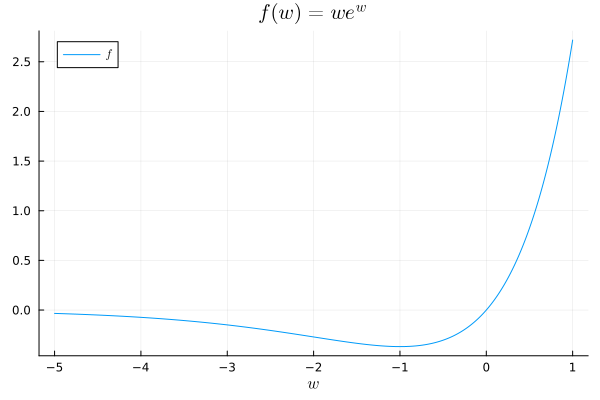

In [81]:
X = -5:.01:1;
Y = X .* exp.(X) ;
 
plot( X, Y, label=L"f", xlabel=L"w", title=L"f(w) =w e^w") 

# L"" is a LaTeX string
# "" is a normal srtring

Element-wise operations can also be written using the following:

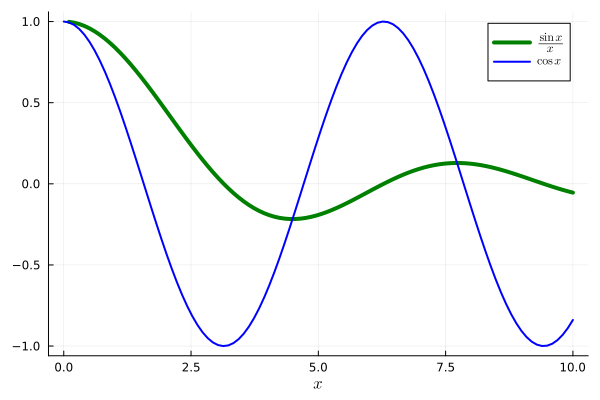

In [82]:
X = range(0, 10, length=100); 
Y1 = @. sin(X) / X; # this is the same as  Y1 = sin.(X) ./ X; 
Y2 = cos.(X); 
plot( X, [Y1 Y2], xlabel=L"x", label=[L"\frac{\sin x}{x}" L"\cos x"], linewidth=[4 2], lc=[:green :blue]) 


# this the same as
plot( X, Y1, xlabel=L"x", label=L"\frac{\sin x}{x}", linewidth=4, lc=:green) 
plot!( X, Y2, label=L"\cos x", linewidth=2, lc=:blue) 
# without the !, only the most recent function will be plotted


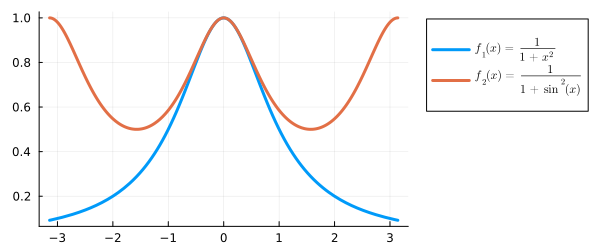

In [83]:
f1(x) = 1 / (1 + x^2);
f2(x) = 1 / (1 + sin(x)^2);
plot(f1, -π, π, lw=3, label = L"f_1(x) = \frac{1}{1+x^2}");
plot!(f2, -π, π, lw = 3, label = L"f_2(x) = \frac{1}{1+\sin^2(x)}", 
    size = (600, 250), legend = :outertopright )

## Basics of Numerical Analysis

- Absolute and relative error
- Rate of convergence
- Using plots to show rate of convergence

Suppose we are approximating $x$ with $\widetilde{x}$. Here, $x$ could be e.g. a root (or fixed point) of a function, the value of an integral, the solution of an ODE or PDE evaluated at a point, .... .   

> **Definition 1 (Errors).** We define $$\text{(Actual) Error:} \qquad x - \widetilde{x},$$ $$\text{Absolute Error:} \qquad |x - \widetilde{x}|,$$ and, when $x \not= 0$, we define $$\text{Relative Error:} \qquad \frac{|x - \widetilde{x}|}{|x|}$$

> **Example 1.** *(i)* If $x = 1.5$ and $\widetilde{x} = 1$, then the absolute error is $0.5$ and the relative error is $\frac{0.5}{1.5} = \frac13$. 
>
> *(ii)* If $x = 1.5 \times 10^{42}$ and $\widetilde{x} = 10^{42}$, then the absolute error is $0.5 \times 10^{42}$ and the relative error is $\frac13$.
>
> *(iii)* If $x = 1.5 \times 10^{-42}$ and $\widetilde{x} = 10^{-42}$, then the absolute error is $0.5 \times 10^{-42}$ and the relative error is $\frac13$.

The relative error is a better measure for small or large $x$. e.g. approximating Planck's constant $6.62607015 \times 10^{-34} \text{m}^2 \text{kg } \text{s}^{-1}$ with $0 \text{m}^2 \text{kg } \text{s}^{-1}$ would give an absolute error of $\approx 6 \times 10^{-34}$ (which seems small) but a relative error of $1$. In practice $0$ is a bad approximation to Planck's constant!

>**Definition 2 (Number of accurate digits)**. Suppose $x \not= 0$ is approximated by $\widetilde{x}$. Then, we say this approximation is accurate to 
>$$\eta := -\log_{10} \left| \frac{x-\widetilde{x}}{x} \right| $$
>digits.

>**Example 2.** Approximating $e := \lim_{n\to\infty} \big( 1 + \frac1n \big)^n \approx 2.7182818.....$ with $3, 2.7,$ and $2.718$ gives $\eta = 0.98, 2.17$, and $3.98$ (to $2$ decimal places), respectively.

We now consider a sequence of approximations $x_n$ converging to $x$. That is, for all $\varepsilon > 0$, there exists $N=N_\varepsilon$ such that $|x - x_n| < \varepsilon$ for all $n > N$. In numerical analysis, we are interested in *(i)* whether our numerical schemes converge, and *(ii)* the rate of convergence: 

>**Definition 2 (Rate of convergence).** Suppose $\varepsilon_n \geq 0$ and $\varepsilon_n \to 0$. Then, $x_n \to x$ with rate $O(\varepsilon_n)$ if there exists $C, N$ such that $|x - x_n| \leq C \varepsilon_n$ for all $n > N$. We also write $x_n = x + O(\varepsilon_n)$.

>**Exercise 1.** Show that $\frac{n + \cos(n)}{n^2} = O(\frac1n)$ and $\frac{n^2+3}{n^{42}} = O(\frac1{n^{40}})$


When plotting graphs, $O(n^{-k})$ decay (that is, **algebraic** decay) can be seen as straight lines on log-log plots ($-k$ is the slope in such graphs):

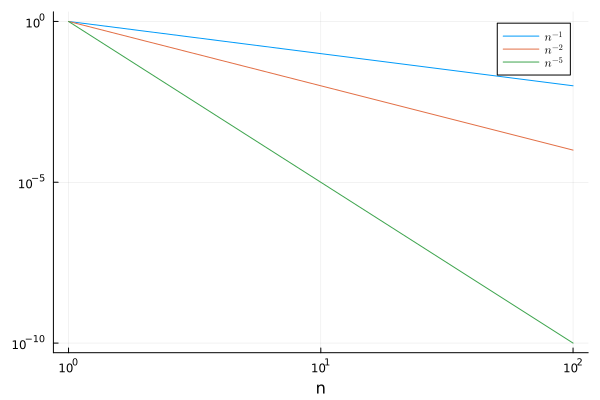

In [84]:
N = 1:100;
plot( N.^(-1) , xlabel="n", xaxis=:log, yaxis=:log, label = L"n^{-1}")
plot!( N.^(-2), label = L"n^{-2}")
plot!( N.^(-5), label = L"n^{-5}")

On the other hand, $O(e^{-c N})$ (that is, **exponential** decay) can be seen as straight lines on a semi-log y plot (and $-c$ is the gradient):

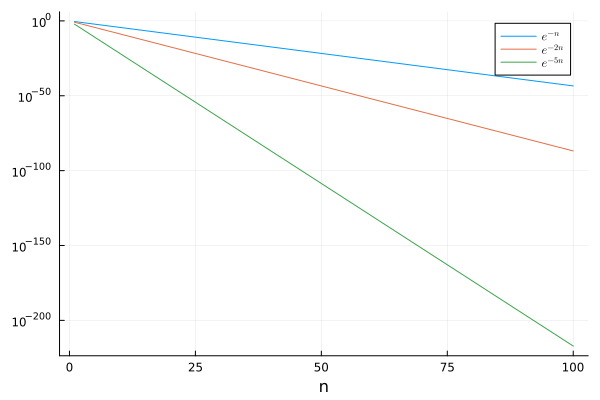

In [85]:
plot( exp.(-N) , xlabel="n", yaxis=:log, label = L"e^{-n}")
plot!( exp.(-2 .* N ), label = L"e^{-2n}")
plot!( exp.(-5 .* N ) , label = L"e^{-5n}")

### Exercises

1. $e_N := \big( 1 + \frac{1}{N} \big)^N$ is an approximation to Euler's number $e := \exp(1)$. What is the error, absolute error, and relative error in approximating $e$ with $e_N$ for $N = 1,2,...,10$? What are the number of accurate digits in this approximation?
2. What is the rate of convergence of this method?

In [86]:
e = exp(1)

2.718281828459045

In [87]:
N = 1:100;
err = @. abs( exp(1) - (1 + 1/N)^N );

Error = absolute error (in this case)

In [88]:
err[1:10]

10-element Vector{Float64}:
 0.7182818284590451
 0.4682818284590451
 0.34791145808867485
 0.2768755784590451
 0.22996182845904567
 0.19665545671693163
 0.17178213141833298
 0.1524973145086972
 0.13710703674584668
 0.12453936835904278

Relative error

In [89]:
err[1:10]/exp(1)

10-element Vector{Float64}:
 0.26424111765711533
 0.17227125736425472
 0.12798947277880338
 0.10185683307753335
 0.08459822894427681
 0.07234549952033957
 0.0631951145094156
 0.05610062684160521
 0.050438860058734485
 0.045815473235769066

Number of correct digits:

In [90]:
η = - log10.( err[1:10]/exp(1) )

10-element Vector{Float64}:
 0.5779996023832055
 0.7637871764659977
 0.8928257498997241
 0.992009830990522
 1.072638728778693
 1.1405884803607715
 1.199316494876063
 1.2510322861176486
 1.297234737241614
 1.338987823174671

Rate of convergence:

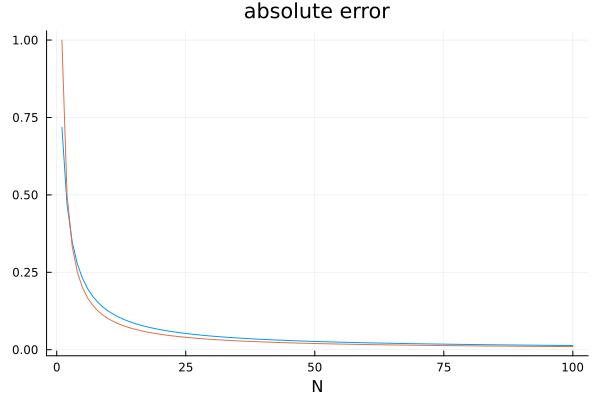

In [91]:
plot( err , xlabel="N", title="absolute error", legend=false)
plot!( N.^(-1) )

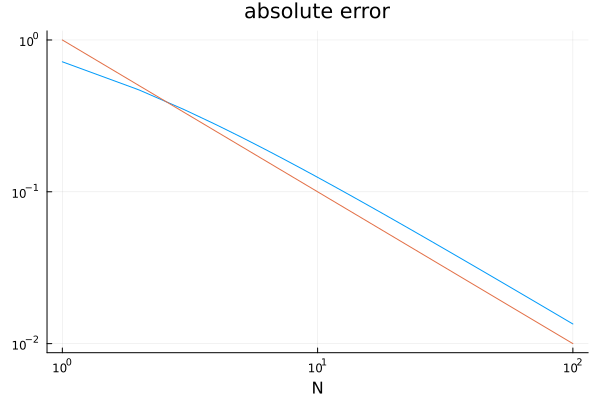

In [92]:
plot( err , xaxis=:log, yaxis=:log, xlabel="N", title="absolute error", legend=false)
plot!( N.^(-1) )

3. Let $\gamma_n :=  \sum_{k=1}^n \frac{1}{k} - \log n$ and define the Euler–Mascheroni constant as $\gamma := \lim_{n\to\infty} \gamma_n$. What is the absolute error in approximating $\gamma$ with $\gamma_{1000}$?
4. What is the rate of convergence of this approximation to $\gamma$?

In [93]:
γ = Base.MathConstants.eulergamma

γ = 0.5772156649015...

In [94]:
Nmax = 1000;

N = 1:Nmax;
γN = zeros( Nmax );
γN[1] = 1;
for n in 2:Nmax
    γN[n] = (1/n) + γN[n-1] + log( (n-1)/n );
end

println( "gamma[1000] = ", γN[1000] )
println( "Absolute error = " , abs( γ - γN[1000] ) )

gamma[1000] = 0.5777155815682078
Absolute error = 0.0004999166666749266


Number of accurate digits:

In [95]:
η = - log10.( abs( γ - γN[1000] )/ γ ) 

3.0624404928861617

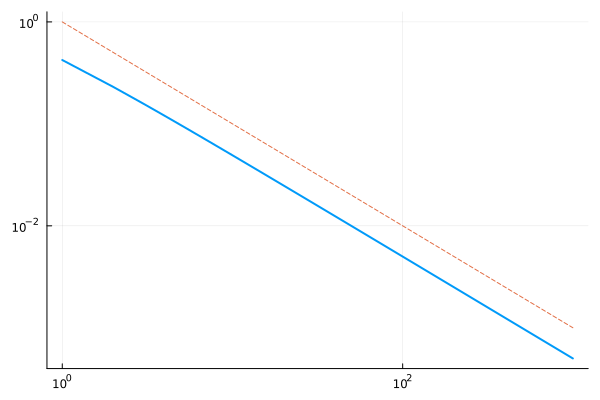

In [96]:
plot( γN .- γ , xaxis=:log, yaxis=:log , legend = false, lw = 2)   
plot!( N.^(-1) , linestyle=:dash)

5. [This was just so that we can remember some calculus and also rigorously prove the rate of convergence that we have seen above using a rigorous error estimate]  
   Prove that $|\gamma - \gamma_n| \leq \frac1n$.

*Proof.* First, notice that $
\begin{align}   
    \gamma_n - \gamma_N 
    %
    &= \log \frac Nn - \sum_{k=n+1}^N \frac{1}{k}\\
    %
    &= \sum_{k=n+1}^N \left( \log \frac{k}{k-1} - \frac{1}{k} \right).
\end{align}$
Here, $\frac1k$ is the area under the rectangle with base $[k-1,k]$ and height $\frac1k$ and $\log \frac{k}{k-1}$ is the integral of $\frac1x$ between $x = k-1$ and $x = k$: 

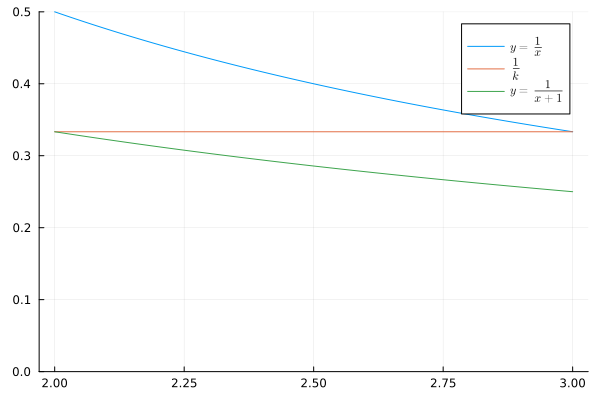

In [97]:
k=3;
x = range(k-1,k, 100);
plot( x, [x.^(-1) ones(100)./k (x .+ 1).^(-1)], 
    ylims=(0,1/(k-1)), 
    label=[L"y=\frac{1}{x}" L"\frac{1}{k}" L"y=\frac{1}{x+1}"] )

In the graph above, $\frac1k$ is the area under the red line, $\log \frac{k}{k-1}$ is the area under the blue line. We upper bound the absolute value of the error between these areas, by computing the area between $y = \frac1x$ and $y=\frac1{x+1}$:
$\begin{align}
    0 \leq \gamma_n - \gamma_N 
    %
    &\leq \sum_{k=n+1}^N \left( \log \frac{k}{k-1} - \frac{1}{k} \right) \\
    %
    &\leq \sum_{k=n+1}^N \int_{k-1}^k \left( \frac{1}{x} - \frac{1}{x + 1} \right) \mathrm{d}x 
    %
    = \int_{n}^\infty \frac{1}{x(x+1)} \mathrm{d}x \\
    %
    &\leq \int_{n}^\infty \frac{1}{x^2} \mathrm{d}x = \frac1n
\end{align}$
Here, we have shown that $(\gamma_n)$ is a Cauchy sequence and thus it converges, and we have the same estimate for $\gamma_n - \gamma$ by taking the limit in $N$. $\text{    }\square$ 